# 재무변수+부도사유 파일 살펴보기

In [423]:
import pandas as pd
import numpy as np
pd.set_option('display.max_row', 1000)
pd.set_option('display.max_columns', 20)
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LassoCV
import tqdm
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
import pandas as pd

from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel

from tqdm import tqdm

from sklearn.datasets import load_iris

import warnings
warnings.filterwarnings(action='ignore')

In [424]:
df_full = pd.read_csv('..\..\Code\SH\SH 생성데이터\재무변수_부도사유nan_verSH.csv', index_col=0)

In [425]:
df_full.loc[df_full['소속코드']==4.0, '부도'] = 0
df_full.loc[df_full['소속코드']!=4.0, '부도'] = 1

In [426]:
df_full

,회사명_x,거래소코드,회계년도,소속코드,상장폐지일,감사의견코드,자산총계(요약),유동자산(요약),당좌자산(요약),현금 및 현금성자산(요약),...,년_x,년+1,key,시간,회사명_y,종목코드,공시제목,제출인,년_y,부도
0,(주)CMG제약,58820.0,2000/12,5.0,NaN,UQ,28990.0,21169.0,10541.0,4330.0,...,2000.0,2001.0,588202001,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1,(주)CMG제약,58820.0,2001/12,5.0,NaN,UQ,20908.0,16359.0,2307.0,1829.0,...,2001.0,2002.0,588202002,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2,(주)CMG제약,58820.0,2002/12,5.0,NaN,UQ,15401.0,9880.0,1436.0,355.0,...,2002.0,2003.0,588202003,NaN,NaN,NaN,NaN,NaN,NaN,1.0
3,(주)CMG제약,58820.0,2003/12,5.0,NaN,UQ,11063.0,8534.0,1083.0,2.0,...,2003.0,2004.0,588202004,NaN,NaN,NaN,NaN,NaN,NaN,1.0
4,(주)CMG제약,58820.0,2004/12,5.0,NaN,UQ,5179.0,3893.0,445.0,11.0,...,2004.0,2005.0,588202005,NaN,NaN,NaN,NaN,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27374,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1019702015,2015-03-02 18:15,우양에이치씨,101970.0,회생절차개시신청,우양에이치씨,2015.0,1.0
27375,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,336002020,2020-11-17 16:01,럭슬,33600.0,[정정]회생절차개시신청,럭슬,2020.0,1.0
27376,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,336002020,2020-09-02 15:40,럭슬,33600.0,회생절차개시신청[정],럭슬,2020.0,1.0
27377,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,862502020,2020-07-28 14:54,이노와이즈,86250.0,회생절차개시결정,화신테크,2020.0,1.0


In [356]:
#누락된 공시제목 bankrupt파일에서 강제할당해주었음으로 거래소 코드가 비어있는 기업 삭제해줌
#isna 반대 notna
df = df_full[df_full['회사명_x'].notna()]

In [ ]:
#누락된 공시제목 bankrupt파일에서 강제할당해주었음으로 거래소 코드가 비어있는 기업 삭제해줌
#isna 반대 notna
df = df_full[df_full['회사명_x'].notna()]

In [357]:
#4 : 파산, 5 : 코스닥 상장기업, 6 : 관리종목
df['소속코드'].value_counts()

5.0    20347
4.0     5436
6.0     1574
Name: 소속코드, dtype: int64

In [132]:
# bankrupt = df[df['소속코드']==4.0]
# regulated = df[df['소속코드']==6.0]

In [110]:
bankrupt.isna().sum()

회사명_x                                 0
거래소코드                                 0
회계년도                                  0
소속코드                                  0
상장폐지일                                 0
감사의견코드                              121
자산총계(요약)                             41
유동자산(요약)                             41
당좌자산(요약)                             41
현금 및 현금성자산(요약)                       41
단기투자자산(요약)                           41
단기예금(요약)                             41
단기매매증권(요약)                           41
단기대여금(요약)                            41
기타단기투자자산(요약)                         41
매출채권(요약)                             41
*할인어음 또는 배서어음(요약)                    41
기타당좌자산(요약)                           41
재고자산(요약)                             41
상품(요약)                               41
제품(요약)                               41
반제품(요약)                              41
재공품(요약)                              41
원재료(요약)                              41
기타재고자산(요약)                           41


In [120]:
bankrupt[bankrupt['감사의견코드'].notna()]['감사의견코드'].value_counts()
# DU 불확실성 DS 감사범위제한 UQ 적정의견 

UQ    4882
DU     184
QU      88
DS      86
QS      31
QG      21
AG      13
NS       8
QQ       2
Name: 감사의견코드, dtype: int64

In [114]:
bankrupt[bankrupt['공시제목'].notna()]['공시제목'].value_counts()

회생절차개시신청                               39
내부결산시점 관리종목 지정 또는 상장폐지 사유 발생           28
파산신청                                   17
내부결산시점 관리종목 지정 또는 상장폐지 사유 발생[정]        16
[정정]내부결산시점 관리종목 지정 또는 상장폐지 사유 발생       16
회생절차개시결정                               15
파산신청 기각                                10
부도발생                                   10
회생절차개시결정[정]                             7
회생절차 폐지결정                               7
[정정]회생절차개시신청                            6
회생절차개시신청[정]                             5
[정정]회생절차개시결정                            5
[정정]회생절차개시결정[정]                         4
[정정]내부결산시점 관리종목 지정 또는 상장폐지 사유 발생[정]     4
화의채무변제완료보고서제출                           3
회생계획 인가                                 3
회생절차 종결신청                               2
회생절차 종결결정                               2
회생절차 개시신청 기각[정]                         1
[정정]회생절차 개시신청 기각                        1
[정정]회생계획 인가                             1
회생계획 인가[정]                              1
Name: 공시제목, dtype: int64

In [74]:
df.isnull().sum()

회사명_x                                  0
거래소코드                                  0
회계년도                                   0
소속코드                                   0
상장폐지일                              21921
감사의견코드                               513
자산총계(요약)                             333
유동자산(요약)                             333
당좌자산(요약)                             333
현금 및 현금성자산(요약)                       333
단기투자자산(요약)                           333
단기예금(요약)                             333
단기매매증권(요약)                           333
단기대여금(요약)                            333
기타단기투자자산(요약)                         333
매출채권(요약)                             333
*할인어음 또는 배서어음(요약)                    333
기타당좌자산(요약)                           333
재고자산(요약)                             333
상품(요약)                               333
제품(요약)                               333
반제품(요약)                              333
재공품(요약)                              333
원재료(요약)                              333
기타재고자산(요약)      

In [324]:
# #소속코드 부도4=0 , 정상 5,6=1
# df.loc[df['소속코드']==4.0, '부도'] = 0
# df.loc[df['소속코드']!=4.0, '부도'] = 1

In [358]:
df['부도']

0        1.0
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
27352    1.0
27353    1.0
27354    1.0
27355    1.0
27356    1.0
Name: 부도, Length: 27357, dtype: float64

In [407]:
subset=df.iloc[:,6:264]

In [408]:
subset

,자산총계(요약),유동자산(요약),당좌자산(요약),현금 및 현금성자산(요약),단기투자자산(요약),단기예금(요약),단기매매증권(요약),단기대여금(요약),기타단기투자자산(요약),매출채권(요약),...,PER(Price earnings ratio)(최저),PBR(Price book-value ratio)(최고),PBR(Price book-value ratio)(최저),PCR(Price cash-flow ratio)(최고),PCR(Price cash-flow ratio)(최저),PSR(Price sales ratio)(최고),PSR(Price sales ratio)(최저),기업가치(EV),EBITDA,EBITDA/매출액
0,28990.0,21169.0,10541.0,4330.0,4552.0,4539.0,1.0,13.0,0.0,786.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,20908.0,16359.0,2307.0,1829.0,18.0,0.0,6.0,13.0,0.0,14.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,15401.0,9880.0,1436.0,355.0,246.0,240.0,6.0,0.0,0.0,26.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,11063.0,8534.0,1083.0,2.0,381.0,380.0,0.0,0.0,1.0,72.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5179.0,3893.0,445.0,11.0,0.0,0.0,0.0,0.0,0.0,33.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27352,79137.0,14794.0,12274.0,1440.0,5065.0,0.0,0.0,0.0,5065.0,5158.0,...,18.25,0.92,0.59,55.71,35.62,0.43,0.28,55934.79,1348.52,0.94
27353,79912.0,15880.0,13124.0,1588.0,5058.0,0.0,0.0,0.0,5058.0,6315.0,...,18.34,0.77,0.55,33.70,24.31,0.34,0.24,46036.63,1147.56,0.74
27354,75206.0,12515.0,11029.0,4017.0,5.0,0.0,0.0,0.0,5.0,4403.0,...,16.65,0.97,0.57,13.22,7.82,0.40,0.24,36557.57,1451.79,0.87
27355,83661.0,22620.0,19701.0,2318.0,11472.0,0.0,0.0,0.0,11472.0,5161.0,...,4.52,1.72,0.50,176.30,51.31,0.86,0.25,78081.78,1009.25,0.67


In [409]:
subset['부도'] = df['부도']

In [412]:
subset = subset.fillna(0)

In [413]:
X = subset.drop('부도', axis=1)
y = subset['부도']

In [333]:
subset.columns

Index(['자산총계(요약)', '유동자산(요약)', '당좌자산(요약)', '현금 및 현금성자산(요약)', '단기투자자산(요약)',
       '단기예금(요약)', '단기매매증권(요약)', '단기대여금(요약)', '기타단기투자자산(요약)', '매출채권(요약)',
       ...
       'PBR(Price book-value ratio)(최고)', 'PBR(Price book-value ratio)(최저)',
       'PCR(Price cash-flow ratio)(최고)', 'PCR(Price cash-flow ratio)(최저)',
       'PSR(Price sales ratio)(최고)', 'PSR(Price sales ratio)(최저)', '기업가치(EV)',
       'EBITDA', 'EBITDA/매출액', '부도'],
      dtype='object', length=259)

In [416]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27357 entries, 0 to 27356
Columns: 258 entries, 자산총계(요약) to EBITDA/매출액
dtypes: float64(258)
memory usage: 55.1 MB


In [368]:
X.columns

Index(['자산총계(요약)', '유동자산(요약)', '당좌자산(요약)', '현금 및 현금성자산(요약)', '단기투자자산(요약)',
       '단기예금(요약)', '단기매매증권(요약)', '단기대여금(요약)', '기타단기투자자산(요약)', '매출채권(요약)',
       ...
       'PER(Price earnings ratio)(최저)', 'PBR(Price book-value ratio)(최고)',
       'PBR(Price book-value ratio)(최저)', 'PCR(Price cash-flow ratio)(최고)',
       'PCR(Price cash-flow ratio)(최저)', 'PSR(Price sales ratio)(최고)',
       'PSR(Price sales ratio)(최저)', '기업가치(EV)', 'EBITDA', 'EBITDA/매출액'],
      dtype='object', length=258)

In [395]:
lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(X, y)
model = SelectFromModel(lsvc, prefit=False, max_features=20)
model.fit(X,y)
X_new = model.transform(X)
X_new.shape

(27357, 20)

In [245]:
# n_features = X_new.shape[1]
# print("feature selection 후 feature 수 : {}". format(n_features))

In [417]:
model.get_feature_names_out()

array(['총자본사업이익률', '총자본영업이익률', '총자본경상이익률 (2007년 이전 발생)', '총자본순이익률', '기업순이익률', '경영자본영업이익률', '조세공과 대 총비용비율', '금융비용 대 총비용비율', '자기자본배당률', '유동자산구성비율', '당좌자산구성비율', '원재료비율', '차입금의존도', '자기자본회전률', '타인자본회전률', '유동자산회전률', '비유동자산회전률', '순운전자본회전률', 'PBR(Price book-value ratio)(최저)', 'PSR(Price sales ratio)(최저)'], dtype=object)

In [435]:
model.estimator_.coef_.astype(float)

TypeError: '<' not supported between instances of 'str' and 'int'

In [386]:
model.estimator_.coef_

TypeError: '<' not supported between instances of 'str' and 'int'

In [379]:
subset[model.get_feature_names_out().astype(str).tolist()].transpose()

,0,1,2,3,4,5,6,7,8,9,...,27347,27348,27349,27350,27351,27352,27353,27354,27355,27356
임대주택자산(요약),0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
이연자산(요약),0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
이연부채(요약),0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
총자본증가율,0.0,0.00,-26.34,-28.17,-53.18,59.87,21.13,120.08,56.55,-33.92,...,1.43,-1.14,-4.74,-2.83,12.89,1.39,0.98,-5.89,11.24,0.07
매출액영업이익률,0.0,1.86,-14.46,-5.26,-21.69,-47.66,-35.59,-74.30,-35.02,-85.24,...,0.65,0.27,-0.08,0.60,0.30,0.67,0.48,0.66,0.33,-0.43
매출액경상이익률 (2007년 이전 발생),0.0,0.71,0.00,0.89,-23.99,-61.11,-102.58,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
총자본사업이익률,0.0,1.63,-20.86,-6.42,-34.93,-29.02,-11.35,-5.80,-12.32,-29.69,...,2.31,1.01,-0.28,1.75,0.79,1.35,0.97,1.54,0.87,-0.44
총자본영업이익률,0.0,1.41,-21.03,-6.91,-34.95,-29.64,-12.93,-8.31,-13.37,-30.14,...,2.26,0.98,-0.29,1.66,0.63,1.23,0.94,1.41,0.63,-0.59
총자본경상이익률 (2007년 이전 발생),0.0,0.53,0.00,1.17,-38.65,-38.01,-37.25,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
총자본순이익률,0.0,0.53,-12.42,0.83,-47.69,-38.01,-37.25,-5.55,-16.46,-63.34,...,2.64,1.91,1.00,2.55,3.98,2.77,2.60,3.06,10.44,5.73


In [378]:
a = pd.DataFrame(model.estimator_.coef_.astype(str), columns= [model.get_feature_names_out()])

ValueError: Shape of passed values is (1, 258), indices imply (1, 50)

In [258]:
pd.DataFrame(model, columns= [model.get_feature_names_out()])

ValueError: DataFrame constructor not properly called!

In [251]:
model.estimator_.coef_.astype(str)[0]

array(['8.10729750177175e-08', '-8.080640628396567e-08', '3.372689799153087e-07', '-1.0873038512594585e-06', '1.457562087297199e-06', '-1.6561414688525115e-06', '-1.7446706336499603e-05', '4.840557239379683e-06', '-4.771258313856923e-06', '-1.6493442854667563e-06', '1.399980890379549e-05', '-7.128920722903892e-08', '-4.899493184561174e-07', '-6.2930757238758465e-06', '-2.8496846876484144e-06', '-4.791202498176595e-07', '-2.5090205294461783e-06', '3.3780108878583564e-06', '-1.3062424966953596e-05', '-0.0004176468233953033', '-2.7075424052239173e-07', '-1.3371465015427411e-06', '-3.341955260735243e-05', '1.170350443011165e-06', '-4.768949949292393e-08', '-3.2466891230635815e-06', '3.0448410519080557e-06', '2.7268335286256054e-06', '-1.3268236037933583e-06', '2.908104344044415e-06', '1.9972466720359638e-06', '2.629567197395036e-06', '5.7535042361509275e-06', '3.2004430731700026e-06', '-0.0016955167644623099', '2.6788360681464065e-07', '5.202979953795631e-08', '7.933263213466107e-07', '-1.

In [231]:
cols

array(['자산총계(요약)', '유동자산(요약)', '당좌자산(요약)', '현금 및 현금성자산(요약)', '단기투자자산(요약)', '단기예금(요약)', '단기매매증권(요약)', '단기대여금(요약)', '기타단기투자자산(요약)', '매출채권(요약)', '*할인어음 또는 배서어음(요약)', '기타당좌자산(요약)', '재고자산(요약)', '상품(요약)', '제품(요약)', '반제품(요약)', '재공품(요약)', '원재료(요약)', '기타재고자산(요약)', '임대주택자산(요약)', '비유동자산(요약)', '투자자산(요약)', '*장기금융상품(요약)', '*투자유가증권(장기투자증권)(요약)', '유형자산(요약)', '토지', '건설중인자산', '건물', '기계장치', '차량운반구', '렌탈자산', '설비자산', '무형자산(요약)', '기타비유동자산(요약)', '이연자산(요약)', '부채총계(요약)', '유동부채(요약)', '매입채무(요약)', '단기차입금(요약)', '유동성장기부채(요약)', '기타유동부채(요약)', '비유동부채(요약)', '사채(요약)', '장기차입금(요약)', '제충당금(요약)', '기타비유동부채(요약)', '이연부채(요약)', '자본총계(요약)', '자본금(요약)', '자본잉여금(요약)', '자본조정(요약)', '기타포괄손익누계액(요약)', '이익잉여금(요약)', '*미처분이익잉여금 및 차기이월미처분이익잉여금(요약)', '*당기순이익(요약)', '부채와자본총계(요약)', '매출액(요약)', '매출원가(요약)', '매출총이익(요약)', '판매비와 관리비(요약)', '급료', '퇴직급여(요약)', '복리후생비(요약)', '세금과공과(요약)', '임차료(요약)', '감가상각비', '연구비', '기타 판매비와 관리비(요약)', '영업이익(요약)', '영업외수익(요약)', '이자수익(요약)', '배당금수익(요약)', '외환차익(요약)', '외화환산이익(요약)', '지분법이익(요약)', '기타영업외수익(요약)', '영업외비용(요약)', '이자비용(요약)'

C:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51088 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 49328 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 52509 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 44228 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 50836 missing from current font.
  font.set_text(s, 0.0

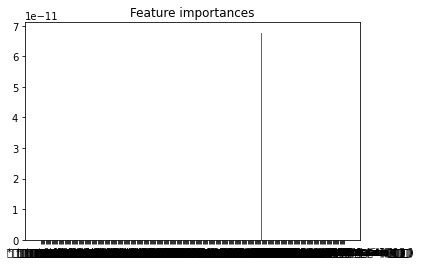

In [225]:

"""하다가 때려침
X = subset.drop('부도', axis=1)
y = subset['부도']

lasso = LassoCV().fit(X, y)
importance = np.abs(lasso.coef_)
feature_names = cols
#feature_names = np.array(subset.columns)
#feature_names = np.array(subset.feature_names)
plt.bar(height=importance, x=feature_names)
plt.rcParams['font.family'] = 'malgun gothic'
plt.title("Feature importances")
plt.show()
""""

In [220]:
feature_names.drop('부도')

AttributeError: 'list' object has no attribute 'drop'

ValueError: shape mismatch: objects cannot be broadcast to a single shape

C:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51088 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 49328 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 52509 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 44228 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 50836 missing from current font.
  font.set_text(s, 0.0

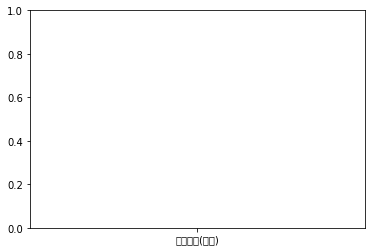

In [210]:
X = subset.drop('부도', axis=1)
y = subset['부도']

lasso = LassoCV().fit(X, y)
importance = np.abs(lasso.coef_)
feature_names = col
#feature_names = np.array(subset.columns)
#feature_names = np.array(subset.feature_names)
plt.bar(height=importance, x=feature_names)
plt.rcParams['font.family'] = 'malgun gothic'
plt.title("Feature importances")
plt.show()